<a href="https://colab.research.google.com/github/thanaprondtn/bsc_dpdm24/blob/main/Project_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

# Prepare Data

In [ ]:
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("purusinghvi/email-spam-classification-dataset")

# List the dataset directory
if os.path.exists(path):
    print("Dataset files:")
    print(os.listdir(path))
else:
    print("Dataset path not found.")


ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
import pandas as pd
import os

In [ ]:

# Define the path to the dataset
dataset_path = os.path.join(path, "combined_data.csv")

# Load the dataset into a Polars DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(df.head())


   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


In [ ]:
!pip install nlp

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
# ขั้นตอนที่ 1: การทำความสะอาดข้อมูล (Cleaning)
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))  # ลบอักขระพิเศษและแปลงเป็นตัวพิมพ์เล็ก

In [ ]:
df

,label,text,cleaned_text
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...,thanks for all your answers guys i know i shou...
...,...,...,...
83443,0,hi given a date how do i get the last date of ...,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...,subscribe change profile contact us long term ...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
# ขั้นตอนที่ 2: การแยกคำ (Tokenization)
df['tokens'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))
df

,label,text,cleaned_text,tokens
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...,"[ounce, feather, bowl, hummingbird, opec, mome..."
1,1,wulvob get your medircations online qnb ikud v...,wulvob get your medircations online qnb ikud v...,"[wulvob, get, your, medircations, online, qnb,..."
2,0,computer connection from cnn com wednesday es...,computer connection from cnn com wednesday es...,"[computer, connection, from, cnn, com, wednesd..."
3,1,university degree obtain a prosperous future m...,university degree obtain a prosperous future m...,"[university, degree, obtain, a, prosperous, fu..."
4,0,thanks for all your answers guys i know i shou...,thanks for all your answers guys i know i shou...,"[thanks, for, all, your, answers, guys, i, kno..."
...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,hi given a date how do i get the last date of ...,"[hi, given, a, date, how, do, i, get, the, las..."
83444,1,now you can order software on cd or download i...,now you can order software on cd or download i...,"[now, you, can, order, software, on, cd, or, d..."
83445,1,dear valued member canadianpharmacy provides a...,dear valued member canadianpharmacy provides a...,"[dear, valued, member, canadianpharmacy, provi..."
83446,0,subscribe change profile contact us long term ...,subscribe change profile contact us long term ...,"[subscribe, change, profile, contact, us, long..."


In [ ]:
# ขั้นตอนที่ 3: การลบ Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text,cleaned_text,tokens,filtered_tokens
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...,"[ounce, feather, bowl, hummingbird, opec, mome...","[ounce, feather, bowl, hummingbird, opec, mome..."
1,1,wulvob get your medircations online qnb ikud v...,wulvob get your medircations online qnb ikud v...,"[wulvob, get, your, medircations, online, qnb,...","[wulvob, get, medircations, online, qnb, ikud,..."
2,0,computer connection from cnn com wednesday es...,computer connection from cnn com wednesday es...,"[computer, connection, from, cnn, com, wednesd...","[computer, connection, cnn, com, wednesday, es..."
3,1,university degree obtain a prosperous future m...,university degree obtain a prosperous future m...,"[university, degree, obtain, a, prosperous, fu...","[university, degree, obtain, prosperous, futur..."
4,0,thanks for all your answers guys i know i shou...,thanks for all your answers guys i know i shou...,"[thanks, for, all, your, answers, guys, i, kno...","[thanks, answers, guys, know, checked, rsync, ..."


In [ ]:
# ขั้นตอนที่ 4: Stemming
stemmer = PorterStemmer()
df['stemmed_tokens'] = df['filtered_tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
df.head()

,label,text,cleaned_text,tokens,filtered_tokens,stemmed_tokens
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...,"[ounce, feather, bowl, hummingbird, opec, mome...","[ounce, feather, bowl, hummingbird, opec, mome...","[ounc, feather, bowl, hummingbird, opec, momen..."
1,1,wulvob get your medircations online qnb ikud v...,wulvob get your medircations online qnb ikud v...,"[wulvob, get, your, medircations, online, qnb,...","[wulvob, get, medircations, online, qnb, ikud,...","[wulvob, get, medirc, onlin, qnb, ikud, viagra..."
2,0,computer connection from cnn com wednesday es...,computer connection from cnn com wednesday es...,"[computer, connection, from, cnn, com, wednesd...","[computer, connection, cnn, com, wednesday, es...","[comput, connect, cnn, com, wednesday, escapen..."
3,1,university degree obtain a prosperous future m...,university degree obtain a prosperous future m...,"[university, degree, obtain, a, prosperous, fu...","[university, degree, obtain, prosperous, futur...","[univers, degre, obtain, prosper, futur, money..."
4,0,thanks for all your answers guys i know i shou...,thanks for all your answers guys i know i shou...,"[thanks, for, all, your, answers, guys, i, kno...","[thanks, answers, guys, know, checked, rsync, ...","[thank, answer, guy, know, check, rsync, manua..."


In [ ]:
# ขั้นตอนที่ 5: Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

,label,text,cleaned_text,tokens,filtered_tokens,stemmed_tokens,lemmatized_tokens
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...,"[ounce, feather, bowl, hummingbird, opec, mome...","[ounce, feather, bowl, hummingbird, opec, mome...","[ounc, feather, bowl, hummingbird, opec, momen...","[ounce, feather, bowl, hummingbird, opec, mome..."
1,1,wulvob get your medircations online qnb ikud v...,wulvob get your medircations online qnb ikud v...,"[wulvob, get, your, medircations, online, qnb,...","[wulvob, get, medircations, online, qnb, ikud,...","[wulvob, get, medirc, onlin, qnb, ikud, viagra...","[wulvob, get, medircations, online, qnb, ikud,..."
2,0,computer connection from cnn com wednesday es...,computer connection from cnn com wednesday es...,"[computer, connection, from, cnn, com, wednesd...","[computer, connection, cnn, com, wednesday, es...","[comput, connect, cnn, com, wednesday, escapen...","[computer, connection, cnn, com, wednesday, es..."
3,1,university degree obtain a prosperous future m...,university degree obtain a prosperous future m...,"[university, degree, obtain, a, prosperous, fu...","[university, degree, obtain, prosperous, futur...","[univers, degre, obtain, prosper, futur, money...","[university, degree, obtain, prosperous, futur..."
4,0,thanks for all your answers guys i know i shou...,thanks for all your answers guys i know i shou...,"[thanks, for, all, your, answers, guys, i, kno...","[thanks, answers, guys, know, checked, rsync, ...","[thank, answer, guy, know, check, rsync, manua...","[thanks, answer, guy, know, checked, rsync, ma..."


In [ ]:
# แสดงผลลัพธ์
print(df[['text', 'cleaned_text', 'tokens', 'filtered_tokens', 'stemmed_tokens', 'lemmatized_tokens']])

                                                    text  \
0      ounce feather bowl hummingbird opec moment ala...   
1      wulvob get your medircations online qnb ikud v...   
2       computer connection from cnn com wednesday es...   
3      university degree obtain a prosperous future m...   
4      thanks for all your answers guys i know i shou...   
...                                                  ...   
83443  hi given a date how do i get the last date of ...   
83444  now you can order software on cd or download i...   
83445  dear valued member canadianpharmacy provides a...   
83446  subscribe change profile contact us long term ...   
83447  get the most out of life ! viagra has helped m...   

                                            cleaned_text  \
0      ounce feather bowl hummingbird opec moment ala...   
1      wulvob get your medircations online qnb ikud v...   
2       computer connection from cnn com wednesday es...   
3      university degree obtain a prosp

In [ ]:
df['email_id'] = df.index+1

In [ ]:
df

,label,text,cleaned_text,tokens,filtered_tokens,stemmed_tokens,lemmatized_tokens,email_id
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...,"[ounce, feather, bowl, hummingbird, opec, mome...","[ounce, feather, bowl, hummingbird, opec, mome...","[ounc, feather, bowl, hummingbird, opec, momen...","[ounce, feather, bowl, hummingbird, opec, mome...",1
1,1,wulvob get your medircations online qnb ikud v...,wulvob get your medircations online qnb ikud v...,"[wulvob, get, your, medircations, online, qnb,...","[wulvob, get, medircations, online, qnb, ikud,...","[wulvob, get, medirc, onlin, qnb, ikud, viagra...","[wulvob, get, medircations, online, qnb, ikud,...",2
2,0,computer connection from cnn com wednesday es...,computer connection from cnn com wednesday es...,"[computer, connection, from, cnn, com, wednesd...","[computer, connection, cnn, com, wednesday, es...","[comput, connect, cnn, com, wednesday, escapen...","[computer, connection, cnn, com, wednesday, es...",3
3,1,university degree obtain a prosperous future m...,university degree obtain a prosperous future m...,"[university, degree, obtain, a, prosperous, fu...","[university, degree, obtain, prosperous, futur...","[univers, degre, obtain, prosper, futur, money...","[university, degree, obtain, prosperous, futur...",4
4,0,thanks for all your answers guys i know i shou...,thanks for all your answers guys i know i shou...,"[thanks, for, all, your, answers, guys, i, kno...","[thanks, answers, guys, know, checked, rsync, ...","[thank, answer, guy, know, check, rsync, manua...","[thanks, answer, guy, know, checked, rsync, ma...",5
...,...,...,...,...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,hi given a date how do i get the last date of ...,"[hi, given, a, date, how, do, i, get, the, las...","[hi, given, date, get, last, date, month, data...","[hi, given, date, get, last, date, month, data...","[hi, given, date, get, last, date, month, data...",83444
83444,1,now you can order software on cd or download i...,now you can order software on cd or download i...,"[now, you, can, order, software, on, cd, or, d...","[order, software, cd, download, site, immediat...","[order, softwar, cd, download, site, immedi, d...","[order, software, cd, download, site, immediat...",83445
83445,1,dear valued member canadianpharmacy provides a...,dear valued member canadianpharmacy provides a...,"[dear, valued, member, canadianpharmacy, provi...","[dear, valued, member, canadianpharmacy, provi...","[dear, valu, member, canadianpharmaci, provid,...","[dear, valued, member, canadianpharmacy, provi...",83446
83446,0,subscribe change profile contact us long term ...,subscribe change profile contact us long term ...,"[subscribe, change, profile, contact, us, long...","[subscribe, change, profile, contact, us, long...","[subscrib, chang, profil, contact, us, long, t...","[subscribe, change, profile, contact, u, long,...",83447


In [ ]:
for_association = df[['label','lemmatized_tokens','email_id']]

In [ ]:
for_association

,label,lemmatized_tokens,email_id
0,1,"[ounce, feather, bowl, hummingbird, opec, mome...",1
1,1,"[wulvob, get, medircations, online, qnb, ikud,...",2
2,0,"[computer, connection, cnn, com, wednesday, es...",3
3,1,"[university, degree, obtain, prosperous, futur...",4
4,0,"[thanks, answer, guy, know, checked, rsync, ma...",5
...,...,...,...
83443,0,"[hi, given, date, get, last, date, month, data...",83444
83444,1,"[order, software, cd, download, site, immediat...",83445
83445,1,"[dear, valued, member, canadianpharmacy, provi...",83446
83446,0,"[subscribe, change, profile, contact, u, long,...",83447


In [ ]:
for_association.to_csv('for_association.csv',index=False)

In [ ]:
!pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


In [ ]:
import pandas as pd

In [ ]:
for_model = pd.read_csv(r'C:\email_project\for_association.csv')

In [ ]:
for_model

,label,lemmatized_tokens,email_id
0,1,"['ounce', 'feather', 'bowl', 'hummingbird', 'o...",1
1,1,"['wulvob', 'get', 'medircations', 'online', 'q...",2
2,0,"['computer', 'connection', 'cnn', 'com', 'wedn...",3
3,1,"['university', 'degree', 'obtain', 'prosperous...",4
4,0,"['thanks', 'answer', 'guy', 'know', 'checked',...",5
...,...,...,...
83443,0,"['hi', 'given', 'date', 'get', 'last', 'date',...",83444
83444,1,"['order', 'software', 'cd', 'download', 'site'...",83445
83445,1,"['dear', 'valued', 'member', 'canadianpharmacy...",83446
83446,0,"['subscribe', 'change', 'profile', 'contact', ...",83447


In [ ]:
print(for_model['lemmatized_tokens'])

0        ['ounce', 'feather', 'bowl', 'hummingbird', 'o...
1        ['wulvob', 'get', 'medircations', 'online', 'q...
2        ['computer', 'connection', 'cnn', 'com', 'wedn...
3        ['university', 'degree', 'obtain', 'prosperous...
4        ['thanks', 'answer', 'guy', 'know', 'checked',...
                               ...                        
83443    ['hi', 'given', 'date', 'get', 'last', 'date',...
83444    ['order', 'software', 'cd', 'download', 'site'...
83445    ['dear', 'valued', 'member', 'canadianpharmacy...
83446    ['subscribe', 'change', 'profile', 'contact', ...
83447    ['get', 'life', 'viagra', 'helped', 'million',...
Name: lemmatized_tokens, Length: 83448, dtype: object


In [ ]:
df = for_model

In [ ]:
import pandas as pd

# ลบตัวเลขออกจาก lemmatized_tokens
df['lemmatized_tokens'] = df['lemmatized_tokens'].str.replace(r'\d+', '', regex=True)

# ตรวจสอบผลลัพธ์
df['lemmatized_tokens'].head()


0    ['ounce', 'feather', 'bowl', 'hummingbird', 'o...
1    ['wulvob', 'get', 'medircations', 'online', 'q...
2    ['computer', 'connection', 'cnn', 'com', 'wedn...
3    ['university', 'degree', 'obtain', 'prosperous...
4    ['thanks', 'answer', 'guy', 'know', 'checked',...
Name: lemmatized_tokens, dtype: object

In [ ]:
import pandas as pd

# ลบคำที่มีตัวอักษรน้อยกว่าหรือเท่ากับ 3 ตัว
df['lemmatized_tokens'] = df['lemmatized_tokens'].str.replace(r"\b\w{1,3}\b", "", regex=True).str.strip()

# ตรวจสอบผลลัพธ์
df['lemmatized_tokens'].head()


0    ['ounce', 'feather', 'bowl', 'hummingbird', 'o...
1    ['wulvob', '', 'medircations', 'online', '', '...
2    ['computer', 'connection', '', '', 'wednesday'...
3    ['university', 'degree', 'obtain', 'prosperous...
4    ['thanks', 'answer', '', 'know', 'checked', 'r...
Name: lemmatized_tokens, dtype: object

In [ ]:
import ast

# แปลง string เป็น list หากเป็น string ที่เหมือนลิสต์
df['lemmatized_tokens'] = df['lemmatized_tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# ลบค่า '' ออกจากแต่ละลิสต์
df['lemmatized_tokens'] = df['lemmatized_tokens'].apply(lambda x: [word for word in x if word.strip()])

# ตรวจสอบผลลัพธ์
df['lemmatized_tokens'].head()


0    [ounce, feather, bowl, hummingbird, opec, mome...
1    [wulvob, medircations, online, ikud, viagra, e...
2    [computer, connection, wednesday, escapenumber...
3    [university, degree, obtain, prosperous, futur...
4    [thanks, answer, know, checked, rsync, manual,...
Name: lemmatized_tokens, dtype: object

In [ ]:
df.to_csv('email_clean2.csv',index=False)

# Association

In [ ]:
import pandas as pd

In [ ]:
association_df = pd.read_csv(r'C:\email_project\email_clean2.csv')
association_df

,label,lemmatized_tokens,email_id
0,1,"['ounce', 'feather', 'bowl', 'hummingbird', 'o...",1
1,1,"['wulvob', 'medircations', 'online', 'ikud', '...",2
2,0,"['computer', 'connection', 'wednesday', 'escap...",3
3,1,"['university', 'degree', 'obtain', 'prosperous...",4
4,0,"['thanks', 'answer', 'know', 'checked', 'rsync...",5
...,...,...,...
83443,0,"['given', 'date', 'last', 'date', 'month', 'da...",83444
83444,1,"['order', 'software', 'download', 'site', 'imm...",83445
83445,1,"['dear', 'valued', 'member', 'canadianpharmacy...",83446
83446,0,"['subscribe', 'change', 'profile', 'contact', ...",83447


In [ ]:
!pip install mlxtend


In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
association_df

,label,lemmatized_tokens,email_id
0,1,"['ounce', 'feather', 'bowl', 'hummingbird', 'o...",1
1,1,"['wulvob', 'medircations', 'online', 'ikud', '...",2
2,0,"['computer', 'connection', 'wednesday', 'escap...",3
3,1,"['university', 'degree', 'obtain', 'prosperous...",4
4,0,"['thanks', 'answer', 'know', 'checked', 'rsync...",5
...,...,...,...
83443,0,"['given', 'date', 'last', 'date', 'month', 'da...",83444
83444,1,"['order', 'software', 'download', 'site', 'imm...",83445
83445,1,"['dear', 'valued', 'member', 'canadianpharmacy...",83446
83446,0,"['subscribe', 'change', 'profile', 'contact', ...",83447


In [ ]:
# แยกกลุ่ม Spam และ Ham
ham_emails = association_df[association_df['label'] == 0]  # Ham (ไม่ใช่สแปม)
spam_emails = association_df[association_df['label'] == 1]  # Spam

In [ ]:
# ตรวจสอบขนาดของแต่ละกลุ่ม
print(f"จำนวน Ham (ไม่ใช่สแปม): {len(ham_emails)}")
print(f"จำนวน Spam: {len(spam_emails)}")

จำนวน Ham (ไม่ใช่สแปม): 39538
จำนวน Spam: 43910


In [ ]:
ham_emails

,label,lemmatized_tokens,email_id
2,0,"['computer', 'connection', 'wednesday', 'escap...",3
4,0,"['thanks', 'answer', 'know', 'checked', 'rsync...",5
5,0,"['larry', 'king', 'live', 'escapenumber', 'esc...",6
6,0,"['michael', 'pobega', 'wrote', 'sure', 'mozill...",7
7,0,"['error', 'sample', 'escapenumber', 'escapenum...",8
...,...,...,...
83436,0,"['list', 'please', 'following', 'simple', 'exa...",83437
83440,0,"['howstuffworks', 'lifestyle', 'april', 'escap...",83441
83442,0,"['tewk', 'wrote', 'patch', 'large', 'attach', ...",83443
83443,0,"['given', 'date', 'last', 'date', 'month', 'da...",83444


In [ ]:
!pip install apyori

In [ ]:
import ast

# แปลงสตริงที่เป็นลิสต์ให้เป็นลิสต์จริงๆ และรวมให้เป็นลิสต์แบน
transactions_em = ham_emails.groupby('email_id')['lemmatized_tokens'].apply(
    lambda x: sum([ast.literal_eval(item) if isinstance(item, str) else item for item in x], [])
)

# ตรวจสอบผลลัพธ์
transactions_em.head()


email_id
3    [computer, connection, wednesday, escapenumber...
5    [thanks, answer, know, checked, rsync, manual,...
6    [larry, king, live, escapenumber, escapenumber...
7    [michael, pobega, wrote, sure, mozilla, didnt,...
8    [error, sample, escapenumber, escapenumber, es...
Name: lemmatized_tokens, dtype: object

In [ ]:
# ตั้งค่าการแสดงผลใน Pandas เพื่อให้แสดงผลทั้งหมด
pd.set_option('display.max_rows', None)  # แสดงทุกแถว
pd.set_option('display.max_columns', None)  # แสดงทุกคอลัมน์

In [ ]:
from apyori import apriori


# สร้าง Frequent Itemsets ด้วย Apriori
frequentItemsetsAS = list(apriori(transactions_em, min_support=0.2))

# คัดเฉพาะ Itemsets ที่มีมากกว่า 1 รายการ และเรียงตาม confidence
sorted_frequentItemsets = sorted(
    (itemset for itemset in frequentItemsetsAS if len(itemset.items) > 1),
    key=lambda x: x.ordered_statistics[0].confidence,
    reverse=True
)

# แสดงผลลัพธ์
for itemset in sorted_frequentItemsets:
    print("yes")
    print(f"Itemset: {itemset.items}")
    print(f"Support: {itemset.support:.3f}")
    for rule in itemset.ordered_statistics:
        print(f"Rule: {rule.items_base} -> {rule.items_add}")
        print(f"Confidence: {rule.confidence:.3f}, Lift: {rule.lift:.3f}")
    print("-" * 40)


yes
Itemset: frozenset({'http', 'escapenumber'})
Support: 0.395
Rule: frozenset() -> frozenset({'http', 'escapenumber'})
Confidence: 0.395, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'http'})
Confidence: 0.734, Lift: 1.558
Rule: frozenset({'http'}) -> frozenset({'escapenumber'})
Confidence: 0.839, Lift: 1.558
----------------------------------------
yes
Itemset: frozenset({'http', 'list'})
Support: 0.292
Rule: frozenset() -> frozenset({'http', 'list'})
Confidence: 0.292, Lift: 1.000
Rule: frozenset({'http'}) -> frozenset({'list'})
Confidence: 0.620, Lift: 1.739
Rule: frozenset({'list'}) -> frozenset({'http'})
Confidence: 0.819, Lift: 1.739
----------------------------------------
yes
Itemset: frozenset({'list', 'escapenumber'})
Support: 0.282
Rule: frozenset() -> frozenset({'list', 'escapenumber'})
Confidence: 0.282, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'list'})
Confidence: 0.524, Lift: 1.469
Rule: frozenset({'list'}) -> frozenset({'escapenumber'

In [ ]:
itemset

RelationRecord(items=frozenset({'read', 'http'}), support=0.20276695836916384, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'read', 'http'}), confidence=0.20276695836916384, lift=1.0), OrderedStatistic(items_base=frozenset({'http'}), items_add=frozenset({'read'}), confidence=0.4304429530201342, lift=1.825273860629565), OrderedStatistic(items_base=frozenset({'read'}), items_add=frozenset({'http'}), confidence=0.8598241098241097, lift=1.825273860629565)])

In [ ]:
rule

OrderedStatistic(items_base=frozenset({'read'}), items_add=frozenset({'http'}), confidence=0.8598241098241097, lift=1.825273860629565)

In [ ]:
sorted_frequentItemsets

[RelationRecord(items=frozenset({'http', 'escapenumber'}), support=0.39544235924932974, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'http', 'escapenumber'}), confidence=0.39544235924932974, lift=1.0), OrderedStatistic(items_base=frozenset({'escapenumber'}), items_add=frozenset({'http'}), confidence=0.7338308457711442, lift=1.5578096096697718), OrderedStatistic(items_base=frozenset({'http'}), items_add=frozenset({'escapenumber'}), confidence=0.8394630872483221, lift=1.5578096096697718)]),
 RelationRecord(items=frozenset({'http', 'list'}), support=0.2919975719560929, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'http', 'list'}), confidence=0.2919975719560929, lift=1.0), OrderedStatistic(items_base=frozenset({'http'}), items_add=frozenset({'list'}), confidence=0.6198657718120806, lift=1.73891392691259), OrderedStatistic(items_base=frozenset({'list'}), items_add=frozenset({'http'}), confidence=0.819142897686959, lif

spam_emails

In [ ]:
spam_emails.head()

,label,lemmatized_tokens,email_id
0,1,"['ounce', 'feather', 'bowl', 'hummingbird', 'o...",1
1,1,"['wulvob', 'medircations', 'online', 'ikud', '...",2
3,1,"['university', 'degree', 'obtain', 'prosperous...",4
8,1,"['work', 'gateway', 'world', 'explore', 'tatto...",9
9,1,"['upon', 'account', 'cautious', 'escapenumber'...",10


In [ ]:
import ast

# แปลงสตริงที่เป็นลิสต์ให้เป็นลิสต์จริงๆ และรวมให้เป็นลิสต์แบน
transactions_em_sp = spam_emails.groupby('email_id')['lemmatized_tokens'].apply(
    lambda x: sum([ast.literal_eval(item) if isinstance(item, str) else item for item in x], [])
)

# ตรวจสอบผลลัพธ์
transactions_em_sp.head()


email_id
1     [ounce, feather, bowl, hummingbird, opec, mome...
2     [wulvob, medircations, online, ikud, viagra, e...
4     [university, degree, obtain, prosperous, futur...
9     [work, gateway, world, explore, tattooing, ful...
10    [upon, account, cautious, escapenumber, would,...
Name: lemmatized_tokens, dtype: object

In [ ]:
from apyori import apriori


# สร้าง Frequent Itemsets ด้วย Apriori
frequentItemsets_sp = list(apriori(transactions_em_sp, min_support=0.2))

# คัดเฉพาะ Itemsets ที่มีมากกว่า 1 รายการ และเรียงตาม confidence
sorted_frequentItemsets_sp= sorted(
    (itemset for itemset in frequentItemsets_sp if len(itemset.items) > 1),
    key=lambda x: x.ordered_statistics[0].confidence,
    reverse=True
)

# แสดงผลลัพธ์
for itemset in sorted_frequentItemsets_sp:
    print("yes")
    print(f"Itemset: {itemset.items}")
    print(f"Support: {itemset.support:.3f}")
    for rule in itemset.ordered_statistics:
        print(f"Rule: {rule.items_base} -> {rule.items_add}")
        print(f"Confidence: {rule.confidence:.3f}, Lift: {rule.lift:.3f}")
    print("-" * 40)


yes
Itemset: frozenset({'http', 'escapenumber'})
Support: 0.210
Rule: frozenset() -> frozenset({'http', 'escapenumber'})
Confidence: 0.210, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'http'})
Confidence: 0.449, Lift: 1.165
Rule: frozenset({'http'}) -> frozenset({'escapenumber'})
Confidence: 0.544, Lift: 1.165
----------------------------------------


In [ ]:
from apyori import apriori


# สร้าง Frequent Itemsets ด้วย Apriori
frequentItemsets_sp = list(apriori(transactions_em_sp, min_support=0.15))

# คัดเฉพาะ Itemsets ที่มีมากกว่า 1 รายการ และเรียงตาม confidence
sorted_frequentItemsets_sp= sorted(
    (itemset for itemset in frequentItemsets_sp if len(itemset.items) > 1),
    key=lambda x: x.ordered_statistics[0].confidence,
    reverse=True
)

# แสดงผลลัพธ์
for itemset in sorted_frequentItemsets_sp:
    print("yes")
    print(f"Itemset: {itemset.items}")
    print(f"Support: {itemset.support:.3f}")
    for rule in itemset.ordered_statistics:
        print(f"Rule: {rule.items_base} -> {rule.items_add}")
        print(f"Confidence: {rule.confidence:.3f}, Lift: {rule.lift:.3f}")
    print("-" * 40)


yes
Itemset: frozenset({'http', 'escapenumber'})
Support: 0.210
Rule: frozenset() -> frozenset({'http', 'escapenumber'})
Confidence: 0.210, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'http'})
Confidence: 0.449, Lift: 1.165
Rule: frozenset({'http'}) -> frozenset({'escapenumber'})
Confidence: 0.544, Lift: 1.165
----------------------------------------
yes
Itemset: frozenset({'price', 'escapenumber'})
Support: 0.155
Rule: frozenset() -> frozenset({'price', 'escapenumber'})
Confidence: 0.155, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'price'})
Confidence: 0.333, Lift: 1.323
Rule: frozenset({'price'}) -> frozenset({'escapenumber'})
Confidence: 0.618, Lift: 1.323
----------------------------------------
yes
Itemset: frozenset({'escapelong', 'escapenumber'})
Support: 0.153
Rule: frozenset() -> frozenset({'escapelong', 'escapenumber'})
Confidence: 0.153, Lift: 1.000
Rule: frozenset({'escapelong'}) -> frozenset({'escapenumber'})
Confidence: 0.844, Lift: 1.807


In [ ]:
from apyori import apriori


# สร้าง Frequent Itemsets ด้วย Apriori
frequentItemsets_sp = list(apriori(transactions_em_sp, min_support=0.1))

# คัดเฉพาะ Itemsets ที่มีมากกว่า 1 รายการ และเรียงตาม confidence
sorted_frequentItemsets_sp= sorted(
    (itemset for itemset in frequentItemsets_sp if len(itemset.items) > 1),
    key=lambda x: x.ordered_statistics[0].confidence,
    reverse=True
)

# แสดงผลลัพธ์
for itemset in sorted_frequentItemsets_sp:
    print("yes")
    print(f"Itemset: {itemset.items}")
    print(f"Support: {itemset.support:.3f}")
    for rule in itemset.ordered_statistics:
        print(f"Rule: {rule.items_base} -> {rule.items_add}")
        print(f"Confidence: {rule.confidence:.3f}, Lift: {rule.lift:.3f}")
    print("-" * 40)


yes
Itemset: frozenset({'http', 'escapenumber'})
Support: 0.210
Rule: frozenset() -> frozenset({'http', 'escapenumber'})
Confidence: 0.210, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'http'})
Confidence: 0.449, Lift: 1.165
Rule: frozenset({'http'}) -> frozenset({'escapenumber'})
Confidence: 0.544, Lift: 1.165
----------------------------------------
yes
Itemset: frozenset({'price', 'escapenumber'})
Support: 0.155
Rule: frozenset() -> frozenset({'price', 'escapenumber'})
Confidence: 0.155, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'price'})
Confidence: 0.333, Lift: 1.323
Rule: frozenset({'price'}) -> frozenset({'escapenumber'})
Confidence: 0.618, Lift: 1.323
----------------------------------------
yes
Itemset: frozenset({'escapelong', 'escapenumber'})
Support: 0.153
Rule: frozenset() -> frozenset({'escapelong', 'escapenumber'})
Confidence: 0.153, Lift: 1.000
Rule: frozenset({'escapelong'}) -> frozenset({'escapenumber'})
Confidence: 0.844, Lift: 1.807


In [ ]:
from apyori import apriori


# สร้าง Frequent Itemsets ด้วย Apriori
frequentItemsets_sp = list(apriori(transactions_em_sp, min_support=0.05))

# คัดเฉพาะ Itemsets ที่มีมากกว่า 1 รายการ และเรียงตาม confidence
sorted_frequentItemsets_sp= sorted(
    (itemset for itemset in frequentItemsets_sp if len(itemset.items) > 1),
    key=lambda x: x.ordered_statistics[0].confidence,
    reverse=True
)

# แสดงผลลัพธ์
for itemset in sorted_frequentItemsets_sp:
    print("yes")
    print(f"Itemset: {itemset.items}")
    print(f"Support: {itemset.support:.3f}")
    for rule in itemset.ordered_statistics:
        print(f"Rule: {rule.items_base} -> {rule.items_add}")
        print(f"Confidence: {rule.confidence:.3f}, Lift: {rule.lift:.3f}")
    print("-" * 40)


yes
Itemset: frozenset({'http', 'escapenumber'})
Support: 0.210
Rule: frozenset() -> frozenset({'http', 'escapenumber'})
Confidence: 0.210, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'http'})
Confidence: 0.449, Lift: 1.165
Rule: frozenset({'http'}) -> frozenset({'escapenumber'})
Confidence: 0.544, Lift: 1.165
----------------------------------------
yes
Itemset: frozenset({'price', 'escapenumber'})
Support: 0.155
Rule: frozenset() -> frozenset({'price', 'escapenumber'})
Confidence: 0.155, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'price'})
Confidence: 0.333, Lift: 1.323
Rule: frozenset({'price'}) -> frozenset({'escapenumber'})
Confidence: 0.618, Lift: 1.323
----------------------------------------
yes
Itemset: frozenset({'escapelong', 'escapenumber'})
Support: 0.153
Rule: frozenset() -> frozenset({'escapelong', 'escapenumber'})
Confidence: 0.153, Lift: 1.000
Rule: frozenset({'escapelong'}) -> frozenset({'escapenumber'})
Confidence: 0.844, Lift: 1.807


In [ ]:
rule

OrderedStatistic(items_base=frozenset({'good'}), items_add=frozenset({'escapenumber'}), confidence=0.48096280087527354, lift=1.0300983604737715)

In [ ]:
sorted_frequentItemsets_sp

[RelationRecord(items=frozenset({'http', 'escapenumber'}), support=0.20983830562514233, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'http', 'escapenumber'}), confidence=0.20983830562514233, lift=1.0), OrderedStatistic(items_base=frozenset({'escapenumber'}), items_add=frozenset({'http'}), confidence=0.44941956882255385, lift=1.1645921078193178), OrderedStatistic(items_base=frozenset({'http'}), items_add=frozenset({'escapenumber'}), confidence=0.5437592210091472, lift=1.1645921078193178)]),
 RelationRecord(items=frozenset({'price', 'escapenumber'}), support=0.1554087907082669, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'price', 'escapenumber'}), confidence=0.1554087907082669, lift=1.0), OrderedStatistic(items_base=frozenset({'escapenumber'}), items_add=frozenset({'price'}), confidence=0.33284557604136183, lift=1.3225273046761559), OrderedStatistic(items_base=frozenset({'price'}), items_add=frozenset({'escapenumb

In [ ]:
association_df2 = association_df.copy()

In [ ]:
association_df2.head()

,label,lemmatized_tokens,email_id
0,1,"['ounce', 'feather', 'bowl', 'hummingbird', 'o...",1
1,1,"['wulvob', 'medircations', 'online', 'ikud', '...",2
2,0,"['computer', 'connection', 'wednesday', 'escap...",3
3,1,"['university', 'degree', 'obtain', 'prosperous...",4
4,0,"['thanks', 'answer', 'know', 'checked', 'rsync...",5


In [ ]:
print(association_df2.columns)
print(association_df2.head())

Index(['label', 'lemmatized_tokens', 'email_id'], dtype='object')
   label                                  lemmatized_tokens  email_id
0      1  ['ounce', 'feather', 'bowl', 'hummingbird', 'o...         1
1      1  ['wulvob', 'medircations', 'online', 'ikud', '...         2
2      0  ['computer', 'connection', 'wednesday', 'escap...         3
3      1  ['university', 'degree', 'obtain', 'prosperous...         4
4      0  ['thanks', 'answer', 'know', 'checked', 'rsync...         5


In [ ]:
import re

association_df2['lemmatized_tokens'] = association_df2['lemmatized_tokens'].apply(
    lambda x: [word for word in eval(x) if not re.match(r'http\S*', word)]
)

association_df2.head()


,label,lemmatized_tokens,email_id
0,1,"[ounce, feather, bowl, hummingbird, opec, mome...",1
1,1,"[wulvob, medircations, online, ikud, viagra, e...",2
2,0,"[computer, connection, wednesday, escapenumber...",3
3,1,"[university, degree, obtain, prosperous, futur...",4
4,0,"[thanks, answer, know, checked, rsync, manual,...",5


In [ ]:
import ast

# แปลงสตริงที่เป็นลิสต์ให้เป็นลิสต์จริงๆ และรวมให้เป็นลิสต์แบน
transactions_em2 = association_df2.groupby('email_id')['lemmatized_tokens'].apply(
    lambda x: sum([ast.literal_eval(item) if isinstance(item, str) else item for item in x], [])
)

# ตรวจสอบผลลัพธ์
transactions_em2.head()


email_id
1    [ounce, feather, bowl, hummingbird, opec, mome...
2    [wulvob, medircations, online, ikud, viagra, e...
3    [computer, connection, wednesday, escapenumber...
4    [university, degree, obtain, prosperous, futur...
5    [thanks, answer, know, checked, rsync, manual,...
Name: lemmatized_tokens, dtype: object

In [ ]:
from apyori import apriori


# สร้าง Frequent Itemsets ด้วย Apriori
frequentItemsets_3 = list(apriori(transactions_em2, min_support=0.1))

# คัดเฉพาะ Itemsets ที่มีมากกว่า 1 รายการ และเรียงตาม confidence
sorted_frequentItemsets_3= sorted(
    (itemset for itemset in frequentItemsets_3 if len(itemset.items) > 1),
    key=lambda x: x.ordered_statistics[0].confidence,
    reverse=True
)

# แสดงผลลัพธ์
for itemset in sorted_frequentItemsets_3:
    print("yes")
    print(f"Itemset: {itemset.items}")
    print(f"Support: {itemset.support:.3f}")
    for rule in itemset.ordered_statistics:
        print(f"Rule: {rule.items_base} -> {rule.items_add}")
        print(f"Confidence: {rule.confidence:.3f}, Lift: {rule.lift:.3f}")
    print("-" * 40)


yes
Itemset: frozenset({'list', 'escapenumber'})
Support: 0.147
Rule: frozenset() -> frozenset({'list', 'escapenumber'})
Confidence: 0.147, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'list'})
Confidence: 0.293, Lift: 1.454
Rule: frozenset({'list'}) -> frozenset({'escapenumber'})
Confidence: 0.729, Lift: 1.454
----------------------------------------
yes
Itemset: frozenset({'help', 'escapenumber'})
Support: 0.141
Rule: frozenset() -> frozenset({'help', 'escapenumber'})
Confidence: 0.141, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'help'})
Confidence: 0.281, Lift: 1.422
Rule: frozenset({'help'}) -> frozenset({'escapenumber'})
Confidence: 0.712, Lift: 1.422
----------------------------------------
yes
Itemset: frozenset({'please', 'escapenumber'})
Support: 0.139
Rule: frozenset() -> frozenset({'please', 'escapenumber'})
Confidence: 0.139, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'please'})
Confidence: 0.276, Lift: 0.953
Rule: frozenset(

In [ ]:
sorted_frequentItemsets_3

[RelationRecord(items=frozenset({'list', 'escapenumber'}), support=0.14685792349726776, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'list', 'escapenumber'}), confidence=0.14685792349726776, lift=1.0), OrderedStatistic(items_base=frozenset({'escapenumber'}), items_add=frozenset({'list'}), confidence=0.2931257175660161, lift=1.4544389867670895), OrderedStatistic(items_base=frozenset({'list'}), items_add=frozenset({'escapenumber'}), confidence=0.7286835533357118, lift=1.4544389867670897)]),
 RelationRecord(items=frozenset({'help', 'escapenumber'}), support=0.14092608570606846, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'help', 'escapenumber'}), confidence=0.14092608570606846, lift=1.0), OrderedStatistic(items_base=frozenset({'escapenumber'}), items_add=frozenset({'help'}), confidence=0.2812858783008037, lift=1.421815008325487), OrderedStatistic(items_base=frozenset({'help'}), items_add=frozenset({'escapenumber'})

In [ ]:
ham2 = association_df2[association_df2['label']==0]

In [ ]:
import ast

# แปลงสตริงที่เป็นลิสต์ให้เป็นลิสต์จริงๆ และรวมให้เป็นลิสต์แบน
transactions_ham2 = ham2.groupby('email_id')['lemmatized_tokens'].apply(
    lambda x: sum([ast.literal_eval(item) if isinstance(item, str) else item for item in x], [])
)

# ตรวจสอบผลลัพธ์
transactions_ham2.head()


email_id
3    [computer, connection, wednesday, escapenumber...
5    [thanks, answer, know, checked, rsync, manual,...
6    [larry, king, live, escapenumber, escapenumber...
7    [michael, pobega, wrote, sure, mozilla, didnt,...
8    [error, sample, escapenumber, escapenumber, es...
Name: lemmatized_tokens, dtype: object

In [ ]:
from apyori import apriori


# สร้าง Frequent Itemsets ด้วย Apriori
frequentItemsets_ham2 = list(apriori(transactions_ham2, min_support=0.19))

# คัดเฉพาะ Itemsets ที่มีมากกว่า 1 รายการ และเรียงตาม confidence
sorted_frequentItemsets_ham2= sorted(
    (itemset for itemset in frequentItemsets_ham2 if len(itemset.items) > 1),
    key=lambda x: x.ordered_statistics[0].confidence,
    reverse=True
)

# แสดงผลลัพธ์
for itemset in sorted_frequentItemsets_ham2:
    print("yes")
    print(f"Itemset: {itemset.items}")
    print(f"Support: {itemset.support:.3f}")
    for rule in itemset.ordered_statistics:
        print(f"Rule: {rule.items_base} -> {rule.items_add}")
        print(f"Confidence: {rule.confidence:.3f}, Lift: {rule.lift:.3f}")
    print("-" * 40)


yes
Itemset: frozenset({'list', 'escapenumber'})
Support: 0.282
Rule: frozenset() -> frozenset({'list', 'escapenumber'})
Confidence: 0.282, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'list'})
Confidence: 0.524, Lift: 1.469
Rule: frozenset({'list'}) -> frozenset({'escapenumber'})
Confidence: 0.791, Lift: 1.469
----------------------------------------
yes
Itemset: frozenset({'help', 'escapenumber'})
Support: 0.254
Rule: frozenset() -> frozenset({'help', 'escapenumber'})
Confidence: 0.254, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'help'})
Confidence: 0.472, Lift: 1.429
Rule: frozenset({'help'}) -> frozenset({'escapenumber'})
Confidence: 0.770, Lift: 1.429
----------------------------------------
yes
Itemset: frozenset({'list', 'mailing'})
Support: 0.240
Rule: frozenset() -> frozenset({'list', 'mailing'})
Confidence: 0.240, Lift: 1.000
Rule: frozenset({'list'}) -> frozenset({'mailing'})
Confidence: 0.673, Lift: 2.757
Rule: frozenset({'mailing'}) -> froze

In [ ]:
sorted_frequentItemsets_ham2

[RelationRecord(items=frozenset({'list', 'escapenumber'}), support=0.28210835145935553, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'list', 'escapenumber'}), confidence=0.28210835145935553, lift=1.0), OrderedStatistic(items_base=frozenset({'escapenumber'}), items_add=frozenset({'list'}), confidence=0.5235145029569135, lift=1.4686190164545514), OrderedStatistic(items_base=frozenset({'list'}), items_add=frozenset({'escapenumber'}), confidence=0.7914005959982972, lift=1.4686190164545514)]),
 RelationRecord(items=frozenset({'help', 'escapenumber'}), support=0.25423643077545655, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'help', 'escapenumber'}), confidence=0.25423643077545655, lift=1.0), OrderedStatistic(items_base=frozenset({'escapenumber'}), items_add=frozenset({'help'}), confidence=0.4717919834788323, lift=1.429184143639754), OrderedStatistic(items_base=frozenset({'help'}), items_add=frozenset({'escapenumber'})

In [ ]:
spam2 = association_df2[association_df2['label']==1]

In [ ]:
import ast

# แปลงสตริงที่เป็นลิสต์ให้เป็นลิสต์จริงๆ และรวมให้เป็นลิสต์แบน
transactions_spam2 = spam2.groupby('email_id')['lemmatized_tokens'].apply(
    lambda x: sum([ast.literal_eval(item) if isinstance(item, str) else item for item in x], [])
)

# ตรวจสอบผลลัพธ์
transactions_spam2.head()


email_id
1     [ounce, feather, bowl, hummingbird, opec, mome...
2     [wulvob, medircations, online, ikud, viagra, e...
4     [university, degree, obtain, prosperous, futur...
9     [work, gateway, world, explore, tattooing, ful...
10    [upon, account, cautious, escapenumber, would,...
Name: lemmatized_tokens, dtype: object

In [ ]:
from apyori import apriori


# สร้าง Frequent Itemsets ด้วย Apriori
frequentItemsets_spam2 = list(apriori(transactions_spam2, min_support=0.05))

# คัดเฉพาะ Itemsets ที่มีมากกว่า 1 รายการ และเรียงตาม confidence
sorted_frequentItemsets_spam2= sorted(
    (itemset for itemset in frequentItemsets_spam2 if len(itemset.items) > 1),
    key=lambda x: x.ordered_statistics[0].confidence,
    reverse=True
)

# แสดงผลลัพธ์
for itemset in sorted_frequentItemsets_spam2:
    print("yes")
    print(f"Itemset: {itemset.items}")
    print(f"Support: {itemset.support:.3f}")
    for rule in itemset.ordered_statistics:
        print(f"Rule: {rule.items_base} -> {rule.items_add}")
        print(f"Confidence: {rule.confidence:.3f}, Lift: {rule.lift:.3f}")
    print("-" * 40)


yes
Itemset: frozenset({'price', 'escapenumber'})
Support: 0.155
Rule: frozenset() -> frozenset({'price', 'escapenumber'})
Confidence: 0.155, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'price'})
Confidence: 0.333, Lift: 1.323
Rule: frozenset({'price'}) -> frozenset({'escapenumber'})
Confidence: 0.618, Lift: 1.323
----------------------------------------
yes
Itemset: frozenset({'escapelong', 'escapenumber'})
Support: 0.153
Rule: frozenset() -> frozenset({'escapelong', 'escapenumber'})
Confidence: 0.153, Lift: 1.000
Rule: frozenset({'escapelong'}) -> frozenset({'escapenumber'})
Confidence: 0.844, Lift: 1.807
Rule: frozenset({'escapenumber'}) -> frozenset({'escapelong'})
Confidence: 0.329, Lift: 1.807
----------------------------------------
yes
Itemset: frozenset({'escapenumber', 'time'})
Support: 0.111
Rule: frozenset() -> frozenset({'escapenumber', 'time'})
Confidence: 0.111, Lift: 1.000
Rule: frozenset({'escapenumber'}) -> frozenset({'time'})
Confidence: 0.238, Lift: 

In [ ]:
sorted_frequentItemsets_spam2

[RelationRecord(items=frozenset({'price', 'escapenumber'}), support=0.1554087907082669, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'price', 'escapenumber'}), confidence=0.1554087907082669, lift=1.0), OrderedStatistic(items_base=frozenset({'escapenumber'}), items_add=frozenset({'price'}), confidence=0.33284557604136183, lift=1.3225273046761559), OrderedStatistic(items_base=frozenset({'price'}), items_add=frozenset({'escapenumber'}), confidence=0.6175006786716134, lift=1.3225273046761556)]),
 RelationRecord(items=frozenset({'escapelong', 'escapenumber'}), support=0.15338191755864267, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'escapelong', 'escapenumber'}), confidence=0.15338191755864267, lift=1.0), OrderedStatistic(items_base=frozenset({'escapelong'}), items_add=frozenset({'escapenumber'}), confidence=0.8437734903532949, lift=1.8071453497909071), OrderedStatistic(items_base=frozenset({'escapenumber'}), items_a

# Model

In [ ]:
df

,label,lemmatized_tokens,email_id
0,1,"[ounce, feather, bowl, hummingbird, opec, mome...",1
1,1,"[wulvob, medircations, online, ikud, viagra, e...",2
2,0,"[computer, connection, wednesday, escapenumber...",3
3,1,"[university, degree, obtain, prosperous, futur...",4
4,0,"[thanks, answer, know, checked, rsync, manual,...",5
...,...,...,...
83443,0,"[given, date, last, date, month, data, form, y...",83444
83444,1,"[order, software, download, site, immediately,...",83445
83445,1,"[dear, valued, member, canadianpharmacy, provi...",83446
83446,0,"[subscribe, change, profile, contact, long, te...",83447


In [ ]:
df.head()

,label,lemmatized_tokens,email_id
0,1,"[ounce, feather, bowl, hummingbird, opec, mome...",1
1,1,"[wulvob, medircations, online, ikud, viagra, e...",2
2,0,"[computer, connection, wednesday, escapenumber...",3
3,1,"[university, degree, obtain, prosperous, futur...",4
4,0,"[thanks, answer, know, checked, rsync, manual,...",5


In [ ]:
df.head()

,label,lemmatized_tokens,email_id
0,1,"[ounce, feather, bowl, hummingbird, opec, mome...",1
1,1,"[wulvob, medircations, online, ikud, viagra, e...",2
2,0,"[computer, connection, wednesday, escapenumber...",3
3,1,"[university, degree, obtain, prosperous, futur...",4
4,0,"[thanks, answer, know, checked, rsync, manual,...",5


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# เตรียมข้อมูล
X = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))  # Convert list of tokens to a single string
y = df['label']

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# ใช้ TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # กำหนด max_features = 1000
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# แสดงขนาดของข้อมูลที่ได้
print(f"Train data shape: {X_train_tfidf.shape}")
print(f"Test data shape: {X_test_tfidf.shape}")


Train data shape: (66758, 1000)
Test data shape: (16690, 1000)


In [ ]:
vectorizer

TfidfVectorizer(max_features=1000)

In [ ]:
X_train

9381     sent email last week need confirm everything p...
11566    taking request http perl petdance journal esca...
40822    escapenumber escapenumber escapenumber tony ma...
35045    sunday escapenumber pril escapenumber escapenu...
38667    sally attached detail analyst energy operation...
                               ...                        
6265     anita conversation today daren deal transactio...
54886    business highlight enron freight market enron ...
76820    rebuilding mandriva linux environment stumblin...
860      alternative medicine database escapenumber mil...
15795    escapenumberfxml version escapenumberd escapen...
Name: lemmatized_tokens, Length: 66758, dtype: object

In [ ]:
import pandas as pd

# แปลง Sparse Matrix เป็น DataFrame และแสดงตัวอย่าง 5 แถวแรก
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())


      able  access  according  account  acrobat  across  action  activity  \
0  0.00000     0.0   0.000000      0.0      0.0     0.0     0.0       0.0   
1  0.00000     0.0   0.000000      0.0      0.0     0.0     0.0       0.0   
2  0.09056     0.0   0.000000      0.0      0.0     0.0     0.0       0.0   
3  0.00000     0.0   0.120917      0.0      0.0     0.0     0.0       0.0   
4  0.00000     0.0   0.000000      0.0      0.0     0.0     0.0       0.0   

   actually  added  ...     wrote  xescapenumber  yahoo      year  yesterday  \
0       0.0    0.0  ...  0.000000            0.0    0.0  0.000000        0.0   
1       0.0    0.0  ...  0.000000            0.0    0.0  0.000000        0.0   
2       0.0    0.0  ...  0.073743            0.0    0.0  0.000000        0.0   
3       0.0    0.0  ...  0.000000            0.0    0.0  0.082863        0.0   
4       0.0    0.0  ...  0.000000            0.0    0.0  0.000000        0.0   

   york  youll  young  youre  zero  
0   0.0    0.0    0

In [ ]:
# Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# สร้าง dictionary สำหรับโมเดล
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': MultinomialNB()
}

# Import cross-validation libraries
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
import numpy as np

# สร้างฟังก์ชันสำหรับคำนวณ ROC-AUC score
roc_auc = make_scorer(roc_auc_score, average='macro', multi_class='ovr')
# ทำ Cross-Validation และคำนวณ KPI
for name, model in models.items():
    cv_results = cross_validate(
        model, X_train_tfidf, y_train, cv=5,
        scoring={
            'accuracy': 'accuracy',
            'precision': 'precision_macro',
            'recall': 'recall_macro',
            'f1': 'f1_macro',
            'roc_auc': make_scorer(roc_auc_score, average='macro', multi_class='ovr')
        }
    )

    print(f"Results for {name}:")
    print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy'])}")
    print(f"Mean Precision: {np.mean(cv_results['test_precision'])}")
    print(f"Mean Recall: {np.mean(cv_results['test_recall'])}")
    print(f"Mean F1 Score: {np.mean(cv_results['test_f1'])}")
    print(f"Mean ROC-AUC: {np.mean(cv_results['test_roc_auc'])}")
    print("=" * 50)



Results for Decision Tree:
Mean Accuracy: 0.9506126536323792
Mean Precision: 0.9505665783721298
Mean Recall: 0.9503686516109626
Mean F1 Score: 0.9504609388916736
Mean ROC-AUC: 0.9503686516109626
Results for Random Forest:
Mean Accuracy: 0.9770064976967232
Mean Precision: 0.9772017485829526
Mean Recall: 0.9767000168601621
Mean F1 Score: 0.9769293361388998
Mean ROC-AUC: 0.9767000168601621
Results for Naive Bayes:
Mean Accuracy: 0.9353934582962774
Mean Precision: 0.9355382534796025
Mean Recall: 0.9348675999947575
Mean F1 Score: 0.9351620385077609
Mean ROC-AUC: 0.9348675999947575


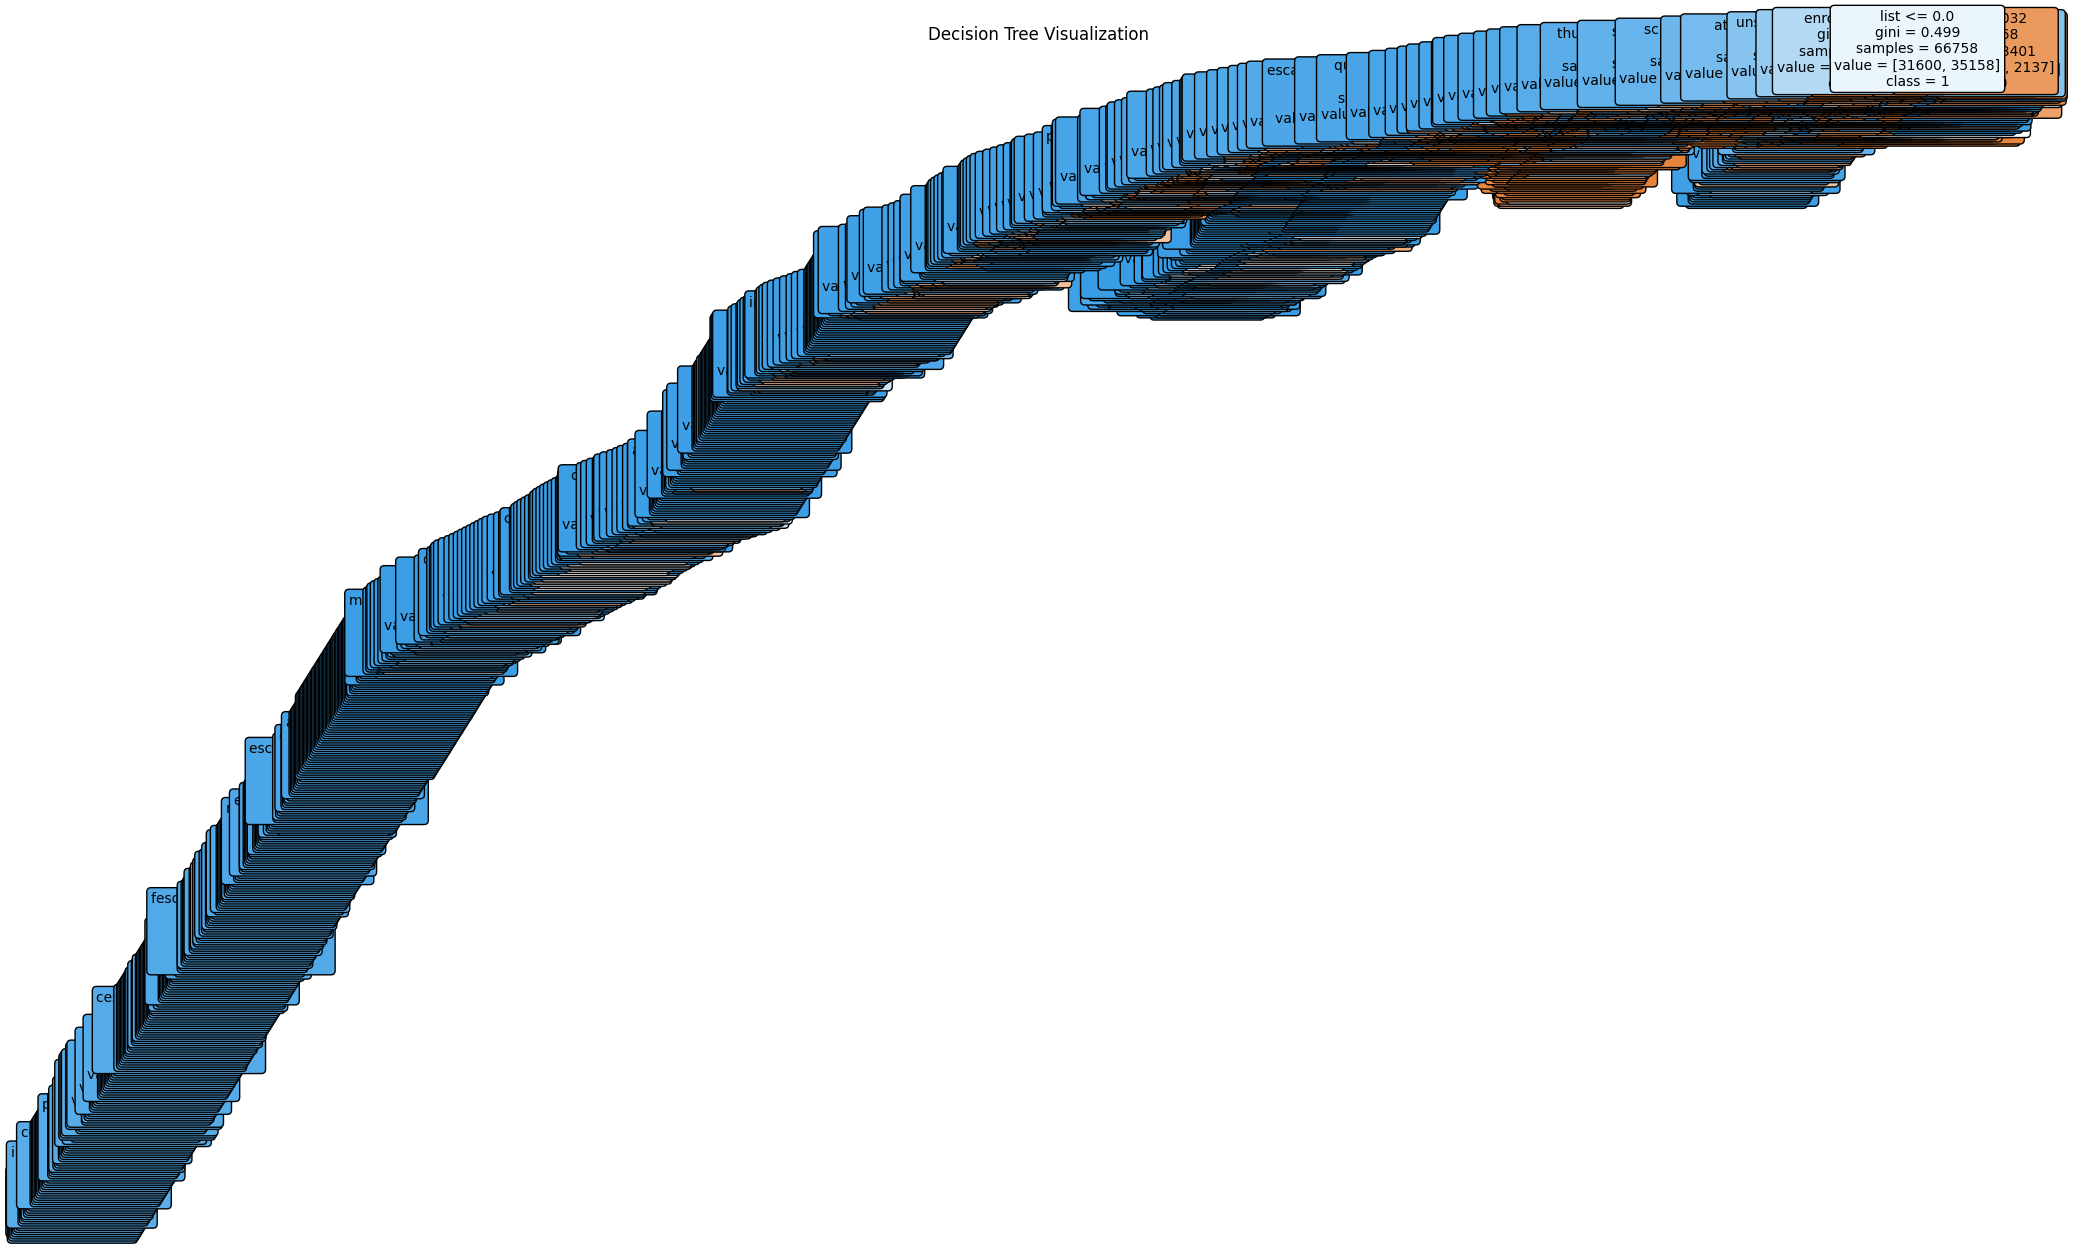

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ฝึกโมเดล Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_tfidf, y_train)

# ดึงชื่อฟีเจอร์และคลาส
feature_names = vectorizer.get_feature_names_out()
class_names = [str(cls) for cls in decision_tree_model.classes_]

# แสดง Decision Tree
plt.figure(figsize=(25, 15))
plot_tree(decision_tree_model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
# คำนวณ KPI เพิ่มเติมหลังจากทดสอบโมเดล
from sklearn.metrics import classification_report

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50)


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7938
           1       0.95      0.95      0.95      8752

    accuracy                           0.95     16690
   macro avg       0.95      0.95      0.95     16690
weighted avg       0.95      0.95      0.95     16690

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7938
           1       0.98      0.99      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7938
           1       0.94      0.95      0.94      8752

    accuracy                           0.94     16690
   macr

# Best Model

In [ ]:
# ฝึกโมเดล Random Forest กับชุดข้อมูลฝึก (train set)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
import joblib

# บันทึกโมเดลเป็นไฟล์ .pkl
joblib.dump(best_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
# โหลดโมเดลจากไฟล์
loaded_model = joblib.load('random_forest_model.pkl')

In [ ]:
# ตัวอย่างข้อความอีเมลใหม่
new_email = ["Congratulations! You've won a free iPhone. Claim now!"]

# แปลงข้อความเป็น TF-IDF แบบเดียวกับที่ใช้ตอน train
new_email_tfidf = vectorizer.transform(new_email)

# ใช้โมเดลทำนาย
prediction = loaded_model.predict(new_email_tfidf)

# แสดงผลลัพธ์
print("Spam" if prediction[0] == 1 else "Not Spam")


Spam


In [ ]:
# แสดงความน่าจะเป็นของแต่ละคลาส (0 = Not Spam, 1 = Spam)
prediction_proba = loaded_model.predict_proba(new_email_tfidf)
print(f"Probability of Not Spam: {prediction_proba[0][0]:.2f}")
print(f"Probability of Spam: {prediction_proba[0][1]:.2f}")


Probability of Not Spam: 0.00
Probability of Spam: 1.00


In [ ]:
# ตัวอย่างอีเมลใหม่ 10 ฉบับ
new_emails = [
    "Congratulations! You've won a free iPhone. Claim now!",  # Spam
    "Meeting reminder: Project discussion at 3 PM tomorrow.",  # Not Spam
    "Limited-time offer! Get 50% off on all products.",        # Spam
    "Please find the attached report for your review.",        # Not Spam
    "URGENT: Your account has been compromised! Reset password immediately.",  # Spam
    "Hi, just checking in to see how you're doing.",           # Not Spam
    "Exclusive deal for you! Book now and save big!",          # Spam
    "Your Amazon order has been shipped and will arrive soon.",# Not Spam
    "Earn $500 daily working from home. No experience needed!",# Spam
    "Can we reschedule our call to next Monday?",              # Not Spam
]

# แปลงข้อความเป็น TF-IDF
new_emails_tfidf = vectorizer.transform(new_emails)

# ทำนายผลลัพธ์
predictions = loaded_model.predict(new_emails_tfidf)

# แสดงผลลัพธ์
for i, email in enumerate(new_emails):
    label = "Spam" if predictions[i] == 1 else "Not Spam"
    print(f"Email {i+1}: {email}\nPrediction: {label}\n{'-'*50}")


Email 1: Congratulations! You've won a free iPhone. Claim now!
Prediction: Spam
--------------------------------------------------
Email 2: Meeting reminder: Project discussion at 3 PM tomorrow.
Prediction: Not Spam
--------------------------------------------------
Email 3: Limited-time offer! Get 50% off on all products.
Prediction: Spam
--------------------------------------------------
Email 4: Please find the attached report for your review.
Prediction: Not Spam
--------------------------------------------------
Email 5: URGENT: Your account has been compromised! Reset password immediately.
Prediction: Not Spam
--------------------------------------------------
Email 6: Hi, just checking in to see how you're doing.
Prediction: Spam
--------------------------------------------------
Email 7: Exclusive deal for you! Book now and save big!
Prediction: Not Spam
--------------------------------------------------
Email 8: Your Amazon order has been shipped and will arrive soon.
Predicti

In [ ]:
predictions

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
new_emails1 = ["""AON Data Transcription Project for Thai Speakers - Remote Freelance และอีก 5 งานที่คุณอาจสนใจ"""]
# แปลงข้อความเป็น TF-IDF
new_emails_tfidf1 = vectorizer.transform(new_emails1)

# ทำนายผลลัพธ์
predictions = loaded_model.predict(new_emails_tfidf1)

# แสดงผลลัพธ์
for i, email in enumerate(new_emails1):
    label = "Spam" if predictions[i] == 1 else "Not Spam"
    print(f"Email {i+1}: {email}\nPrediction: {label}\n{'-'*50}")


Email 1: AON Data Transcription Project for Thai Speakers - Remote Freelance และอีก 5 งานที่คุณอาจสนใจ
Prediction: Not Spam
--------------------------------------------------


In [ ]:
new_emails1 = ["""Hi Meimei2140,

It’s time to get your models ready — March Machine Learning Mania 2025 is now live!

In our 11th annual competition, Kagglers will predict the outcomes of this year’s NCAA college basketball tournaments. Unlike traditional fans, you’ll use historical data and computing power to forecast every possible game outcome.

Make predictions for both the men’s and women’s tournaments. Predict every possible outcome, no matter how likely or unlikely. Your submissions will be scored and updated throughout the tournament based on the games played.
"""]
# แปลงข้อความเป็น TF-IDF
new_emails_tfidf1 = vectorizer.transform(new_emails1)

# ทำนายผลลัพธ์
predictions = loaded_model.predict(new_emails_tfidf1)

# แสดงผลลัพธ์
for i, email in enumerate(new_emails1):
    label = "Spam" if predictions[i] == 1 else "Not Spam"
    print(f"Email {i+1}: {email}\nPrediction: {label}\n{'-'*50}")


Email 1: Hi Meimei2140,

It’s time to get your models ready — March Machine Learning Mania 2025 is now live!

In our 11th annual competition, Kagglers will predict the outcomes of this year’s NCAA college basketball tournaments. Unlike traditional fans, you’ll use historical data and computing power to forecast every possible game outcome.

Make predictions for both the men’s and women’s tournaments. Predict every possible outcome, no matter how likely or unlikely. Your submissions will be scored and updated throughout the tournament based on the games played.

Prediction: Spam
--------------------------------------------------


# ความถี่ ลองทำ แต่ไม่ได้ใช้ในโมเดลจริง

In [ ]:
import pandas as pd
from collections import Counter

In [ ]:
# ฟังก์ชันในการนับความถี่ของคำในแต่ละอีเมล์
def count_word_frequencies(tokens):
    return Counter(tokens)

# ใช้ pandas เพื่อประมวลผลทุกแถวใน df
def get_filtered_word_counts(df):
    # สร้าง list เพื่อเก็บผลลัพธ์
    results = []

    # ประมวลผลแต่ละอีเมล์
    for email_id, tokens in zip(df['email_id'], df['lemmatized_tokens']):
        word_counts = count_word_frequencies(tokens)

        # กรองคำที่มีความถี่มากกว่า 5
        filtered_counts = {word: count for word, count in word_counts.items() if count > 5}

        if filtered_counts:
            for word, count in filtered_counts.items():
                results.append({'email_id': email_id, 'word': word, 'count': count})

    return pd.DataFrame(results)



In [ ]:
# สร้าง DataFrame ที่เก็บผลลัพธ์
filtered_word_counts_df = get_filtered_word_counts(df)

In [ ]:
# แสดงผลลัพธ์บางส่วน
filtered_word_counts_df

,email_id,word,count
0,2,escapenumber,27
1,3,escapenumber,23
2,3,http,9
3,3,html,6
4,4,escapenumber,11
...,...,...,...
191014,83447,escapenumber,43
191015,83447,weather,7
191016,83447,april,7
191017,83447,escapenumberc,23


In [ ]:
import pandas as pd

In [ ]:
for_model2 = pd.merge(filtered_word_counts_df,df,on=['email_id'],how='left')
for_model2

,email_id,word,count,label,lemmatized_tokens
0,2,escapenumber,27,1,"[wulvob, medircations, online, ikud, viagra, e..."
1,3,escapenumber,23,0,"[computer, connection, wednesday, escapenumber..."
2,3,http,9,0,"[computer, connection, wednesday, escapenumber..."
3,3,html,6,0,"[computer, connection, wednesday, escapenumber..."
4,4,escapenumber,11,1,"[university, degree, obtain, prosperous, futur..."
...,...,...,...,...,...
191014,83447,escapenumber,43,0,"[subscribe, change, profile, contact, long, te..."
191015,83447,weather,7,0,"[subscribe, change, profile, contact, long, te..."
191016,83447,april,7,0,"[subscribe, change, profile, contact, long, te..."
191017,83447,escapenumberc,23,0,"[subscribe, change, profile, contact, long, te..."


In [ ]:
for_model2 = for_model2[['email_id','word','count','label']]

In [ ]:
for_model2

,email_id,word,count,label
0,2,escapenumber,27,1
1,3,escapenumber,23,0
2,3,http,9,0
3,3,html,6,0
4,4,escapenumber,11,1
...,...,...,...,...
191014,83447,escapenumber,43,0
191015,83447,weather,7,0
191016,83447,april,7,0
191017,83447,escapenumberc,23,0


In [ ]:
print(for_model2.info())
print(for_model2.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191019 entries, 0 to 191018
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   email_id  191019 non-null  int64 
 1   word      191019 non-null  object
 2   count     191019 non-null  int64 
 3   label     191019 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB
None
Index(['email_id', 'word', 'count', 'label'], dtype='object')


In [ ]:
for_model2['count'].sort_values(ascending=False)

119490    6383
13440     4086
119474    4029
119475    3657
121596    2734
          ... 
71           6
73           6
190863       6
190865       6
93           6
Name: count, Length: 191019, dtype: int64

In [ ]:
print(for_model2[for_model2['count'].isin([6383, 4086, 4029, 3675])])

        email_id          word  count  label
13440       5806  escapenumber   4086      0
119474     52109         const   4029      0
119490     52109        struct   6383      0


In [ ]:
print(for_model2[for_model2['word'] == 'struct'].sort_values(by='count', ascending=False))

        email_id    word  count  label
119490     52109  struct   6383      0
52476      23537  struct    173      0
181354     79382  struct     88      0
150872     65886  struct     87      0
60886      27325  struct     84      0
...          ...     ...    ...    ...
169125     73597  struct      6      0
171596     74852  struct      6      0
172206     75165  struct      6      0
177828     77919  struct      6      0
1814         684  struct      6      0

[355 rows x 4 columns]


In [ ]:
print(for_model2[for_model2['word'] == 'escapenumber'].sort_values(by='count', ascending=False))

        email_id          word  count  label
13440       5806  escapenumber   4086      0
121596     52678  escapenumber   2734      0
146070     63879  escapenumber   2595      0
179447     78512  escapenumber   2550      0
146294     63964  escapenumber   2084      0
...          ...           ...    ...    ...
17182       7529  escapenumber      6      1
174848     76386  escapenumber      6      1
174985     76426  escapenumber      6      0
16801       7353  escapenumber      6      1
17336       7615  escapenumber      6      0

[26656 rows x 4 columns]


In [ ]:
print(for_model2[for_model2['word'] == 'const'].sort_values(by='count', ascending=False))

        email_id   word  count  label
119474     52109  const   4029      0
32854      14709  const    199      0
91243      40227  const    199      0
151885     66261  const    199      0
38867      17117  const     90      0
...          ...    ...    ...    ...
153344     66798  const      6      0
176105     77020  const      6      0
168728     73433  const      6      0
176699     77330  const      6      0
190566     83357  const      6      0

[168 rows x 4 columns]


In [ ]:
print(for_model2[for_model2['count'] >1000].sort_values(by='count', ascending=False))

        email_id              word  count  label
119490     52109            struct   6383      0
13440       5806      escapenumber   4086      0
119474     52109             const   4029      0
119475     52109              char   3657      0
121596     52678      escapenumber   2734      0
146073     63879        escapelong   2724      0
146070     63879      escapenumber   2595      0
179447     78512      escapenumber   2550      0
119486     52109          ntstatus   2089      0
146294     63964      escapenumber   2084      0
34138      15262      escapenumber   2079      0
122175     53036      escapenumber   2043      0
93584      41335      escapenumber   2041      0
119472     52109              void   2011      0
119480     52109              bool   1860      0
138952     60792      escapenumber   1833      0
125966     54684      escapenumber   1778      0
32082      14509      escapenumber   1648      0
149244     65349      escapenumber   1622      0
73242      32324    

In [ ]:
!pip install matplotlib

In [ ]:
# เรียงลำดับข้อมูลในคอลัมน์ 'count' จากมากไปน้อยและแสดงผลลัพธ์
print(for_model2.sort_values(by='count', ascending=False))

        email_id          word  count  label
119490     52109        struct   6383      0
13440       5806  escapenumber   4086      0
119474     52109         const   4029      0
119475     52109          char   3657      0
121596     52678  escapenumber   2734      0
...          ...           ...    ...    ...
71            47    originator      6      0
73            48         iraqi      6      1
190863     83396       federal      6      0
190865     83396      spending      6      0
93            53        policy      6      0

[191019 rows x 4 columns]


In [ ]:
for_model2.describe()

,email_id,count,label
count,191019.000000,191019.000000,191019.000000
mean,41939.106084,17.485423,0.235741
std,23986.308168,45.967848,0.424462
min,2.000000,6.000000,0.000000
25%,21269.500000,7.000000,0.000000
50%,42171.000000,9.000000,0.000000
75%,62697.000000,15.000000,0.000000
max,83447.000000,6383.000000,1.000000


In [ ]:
# คำนวณ IQR
Q1 = for_model2['count'].quantile(0.25)
Q3 = for_model2['count'].quantile(0.75)
IQR = Q3 - Q1

# กำหนดขอบเขตของ outlier
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# หาคำที่มีความถี่เกินขอบเขต outlier
outliers = for_model2[(for_model2['count'] < lower_bound) | (for_model2['count'] > upper_bound)]

# แสดงคำที่เป็น outlier
print(outliers)


        email_id            word  count  label
15            13    escapenumber     39      1
18            20    escapenumber     97      0
30            22    escapenumber     35      1
35            27    escapenumber     58      0
36            30    escapenumber     45      0
...          ...             ...    ...    ...
190996     83440            pill     33      1
190997     83440  escapenumbermg     33      1
190998     83440            item     28      1
191013     83444    escapenumber    109      0
191014     83447    escapenumber     43      0

[20105 rows x 4 columns]


In [ ]:
lower_bound

np.float64(-5.0)

In [ ]:
upper_bound

np.float64(27.0)

In [ ]:
# เรียงลำดับข้อมูลในคอลัมน์ 'count' จากมากไปน้อยและแสดงผลลัพธ์
print(outliers.sort_values(by='count', ascending=False))

        email_id          word  count  label
119490     52109        struct   6383      0
13440       5806  escapenumber   4086      0
119474     52109         const   4029      0
119475     52109          char   3657      0
121596     52678  escapenumber   2734      0
...          ...           ...    ...    ...
40870      18094        united     28      0
81843      36192  escapenumber     28      0
79292      35104          item     28      1
79350      35109          item     28      1
41142      18239  escapenumber     28      1

[20105 rows x 4 columns]


In [ ]:
# นับจำนวนของ 'label' ใน outliers และรวมถึงจำนวน email_id ที่ต่างกัน
outliers.groupby('label')['email_id'].nunique()

label
0    7488
1    3890
Name: email_id, dtype: int64

In [ ]:
for_model2.columns

Index(['email_id', 'word', 'count', 'label'], dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# สร้าง TfidfVectorizer และแปลงข้อความ
vectorizer = TfidfVectorizer(max_features=500)  # เลือกแค่ 500 คำที่สำคัญที่สุด
X_tfidf = vectorizer.fit_transform(for_model2['text_column'])


KeyError: 'text_column'